In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns",100)
import warnings
warnings.filterwarnings("ignore")

In [4]:

from google.colab import files
files.upload()

Saving date-hour-soo-dest-2020.csv to date-hour-soo-dest-2020.csv


In [5]:
df=pd.read_csv("date-hour-soo-dest-2020.csv")

In [ ]:
##EDA

In [20]:
df.head()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2020-01-01,0,12TH,16TH,5
1,2020-01-01,0,12TH,24TH,3
2,2020-01-01,0,12TH,ASHB,6
3,2020-01-01,0,12TH,BAYF,1
4,2020-01-01,0,12TH,CIVC,3


In [ ]:
df.tail()

,Date,Hour,Origin Station,Destination Station,Trip Count
5811858,2020-12-31,23,FRMT,BERY,1
5811859,2020-12-31,23,FRMT,MLPT,1
5811860,2020-12-31,23,MCAR,ANTC,1
5811861,2020-12-31,23,MLBR,MLBR,1
5811862,2020-12-31,23,POWL,BERY,1


In [ ]:
df.sample(5)

,Date,Hour,Origin Station,Destination Station,Trip Count
2033965,2020-03-24,6,PITT,MLBR,2
248187,2020-01-10,15,19TH,MLBR,7
2930482,2020-06-14,21,NBRK,RICH,1
2032994,2020-03-24,5,12TH,CIVC,2
4113442,2020-09-05,20,SHAY,BERY,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811863 entries, 0 to 5811862
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Date                 object
 1   Hour                 int64 
 2   Origin Station       object
 3   Destination Station  object
 4   Trip Count           int64 
dtypes: int64(2), object(3)
memory usage: 221.7+ MB


In [ ]:
df.isnull().sum()

Date                   0
Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
dtype: int64

In [7]:
df["Date"]=pd.to_datetime(df["Date"])

In [8]:
df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month_name()
df["day"]=df["Date"].dt.day_name()
df["month_num"]=df["Date"].dt.month
df["day_num"]=df["Date"].dt.dayofweek

In [ ]:
df.sample(5)

,Date,Hour,Origin Station,Destination Station,Trip Count,year,month,day,month_num,day_num
4054851,2020-09-02,6,UCTY,MONT,6,2020,September,Wednesday,9,2
5749197,2020-12-27,14,PLZA,POWL,3,2020,December,Sunday,12,6
5161338,2020-11-14,19,POWL,MLBR,4,2020,November,Saturday,11,5
5394722,2020-12-01,12,POWL,SSAN,2,2020,December,Tuesday,12,1
1733298,2020-03-08,15,SANL,24TH,2,2020,March,Sunday,3,6


In [9]:
del df["Date"]

In [18]:
df.sample()

,Hour,Origin Station,Destination Station,Trip Count
3077640,8,COLS,SHAY,1


In [ ]:
df.describe()

,Hour,Trip Count,year,month_num,day_num
count,5.811863e+06,5.811863e+06,5811863.0,5.811863e+06,5.811863e+06
mean,1.352784e+01,5.407264e+00,2020.0,5.936740e+00,2.777982e+00
std,4.925962e+00,1.811828e+01,0.0,3.676376e+00,1.891037e+00
min,0.000000e+00,1.000000e+00,2020.0,1.000000e+00,0.000000e+00
25%,9.000000e+00,1.000000e+00,2020.0,2.000000e+00,1.000000e+00
50%,1.400000e+01,2.000000e+00,2020.0,6.000000e+00,3.000000e+00
75%,1.800000e+01,4.000000e+00,2020.0,9.000000e+00,4.000000e+00
max,2.300000e+01,9.250000e+02,2020.0,1.200000e+01,6.000000e+00


In [ ]:
df.corr()

,Hour,Trip Count,year,month_num,day_num
Hour,1.000000,-0.017611,NaN,-0.018326,0.074817
Trip Count,-0.017611,1.000000,NaN,-0.165873,-0.042222
year,NaN,NaN,NaN,NaN,NaN
month_num,-0.018326,-0.165873,NaN,1.000000,-0.046301
day_num,0.074817,-0.042222,NaN,-0.046301,1.000000


In [ ]:
df["Origin Station"].value_counts()

POWL    228578
CIVC    219160
EMBR    206637
MONT    202319
16TH    183182
FTVL    176850
24TH    173518
12TH    169909
MCAR    158738
19TH    157526
COLS    154693
DELN    146136
DBRK    145980
SANL    144048
LAKE    138577
SFIA    137165
BAYF    136738
BALB    135481
DALY    133553
RICH    131998
CONC    124987
WOAK    124582
HAYW    122973
GLEN    119373
ASHB    106501
DUBL    105822
WCRK    104990
PITT    101765
FRMT    100394
SHAY     97713
UCTY     97641
PHIL     97518
PLZA     96762
ANTC     90682
SBRN     88266
ROCK     87151
NBRK     85352
COLM     83711
MLBR     81410
WARM     79171
SSAN     73856
CAST     67659
WDUB     62707
PCTR     61970
LAFY     58445
OAKL     51445
ORIN     51012
NCON     49385
BERY     33044
MLPT     24790
Name: Origin Station, dtype: int64

In [ ]:
df["Destination Station"].value_counts()

POWL    221895
CIVC    213011
MONT    208987
EMBR    208903
16TH    180711
FTVL    179241
24TH    173104
12TH    165301
COLS    159079
MCAR    158595
19TH    153119
DELN    148608
SANL    147306
DBRK    147245
LAKE    141289
BAYF    139723
BALB    134207
DALY    132940
RICH    132653
CONC    126965
HAYW    126707
SFIA    122462
WOAK    121522
GLEN    119515
WCRK    106602
ASHB    104927
DUBL    104715
PITT    102900
FRMT    101506
UCTY     99159
PHIL     99137
SHAY     98298
PLZA     97737
ANTC     95886
ROCK     88999
SBRN     88187
NBRK     85234
COLM     82212
MLBR     79344
WARM     77965
SSAN     75021
CAST     68696
WDUB     65877
PCTR     63031
LAFY     60227
ORIN     51450
NCON     49968
OAKL     41557
BERY     35093
MLPT     25047
Name: Destination Station, dtype: int64

In [10]:
df["Route"]=df[["Origin Station","Destination Station"]].apply(lambda x:"-".join(x),axis=1)

In [25]:
df.sample(5)

,Hour,Origin Station,Destination Station,Trip Count,year,month,day,month_num,day_num,Route
421099,22,SFIA,16TH,5,2020,January,Thursday,1,3,SFIA-16TH
2079186,14,PHIL,WOAK,1,2020,March,Friday,3,4,PHIL-WOAK
277288,16,UCTY,UCTY,1,2020,January,Saturday,1,5,UCTY-UCTY
831997,11,12TH,DALY,1,2020,February,Sunday,2,6,12TH-DALY
314121,9,SFIA,BAYF,1,2020,January,Monday,1,0,SFIA-BAYF


In [ ]:
df["Route"].nunique()

2500

In [ ]:
import plotly.express as px

In [ ]:
idx=df.groupby(["Hour"])["Trip Count"].transform(max)==df["Trip Count"]
px.bar(df[idx],x="Hour",y="Trip Count",hover_name="Route",color="Route").show();
#en az popüler olan rota EMBR-WARM (19 sefer yapılmış) rotasıdır.

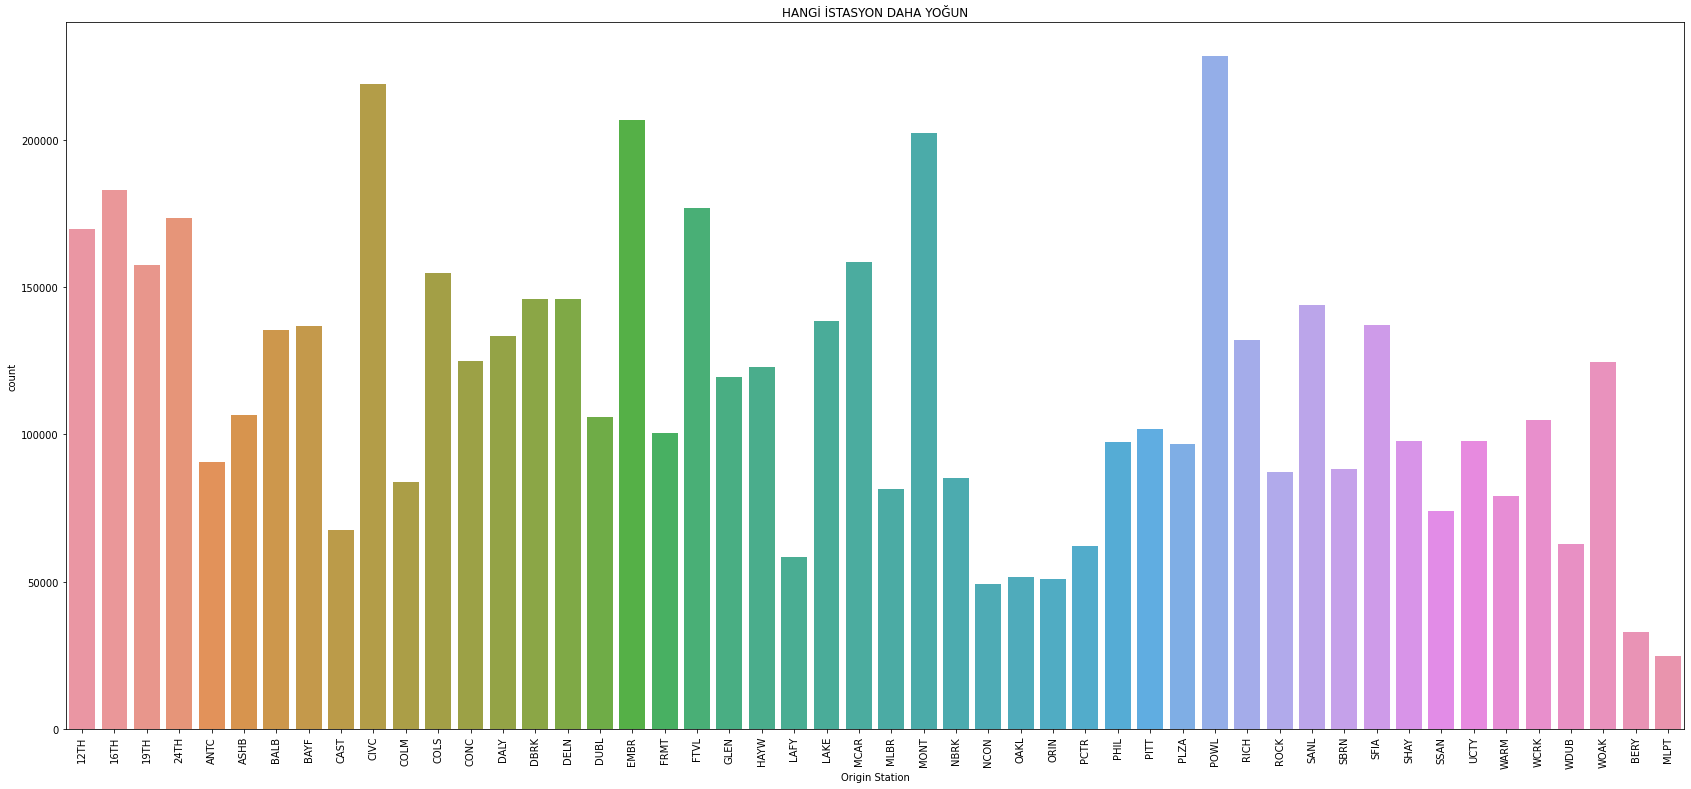

In [ ]:
plt.figure(figsize=(29,13))
sns.countplot(df["Origin Station"])
plt.title("HANGİ İSTASYON DAHA YOĞUN")
plt.xticks(rotation=90);
#en yoğun istasyonun POWL istasyonu olduğunu görmüş olduk

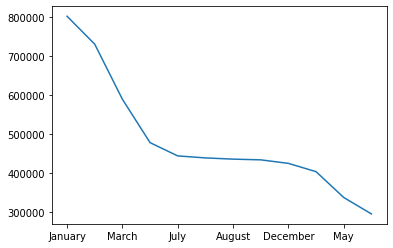

In [ ]:
df["month"].value_counts().plot()

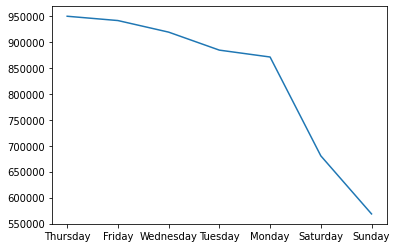

In [ ]:
df["day"].value_counts().plot()

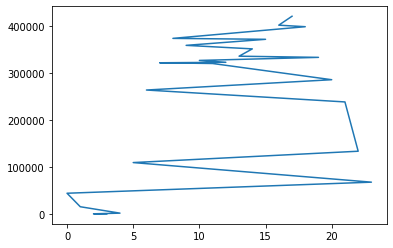

In [ ]:
df["Hour"].value_counts().plot()

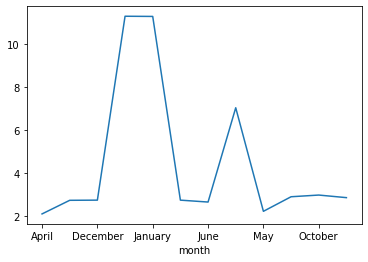

In [ ]:
df.groupby("month")["Trip Count"].mean().plot()

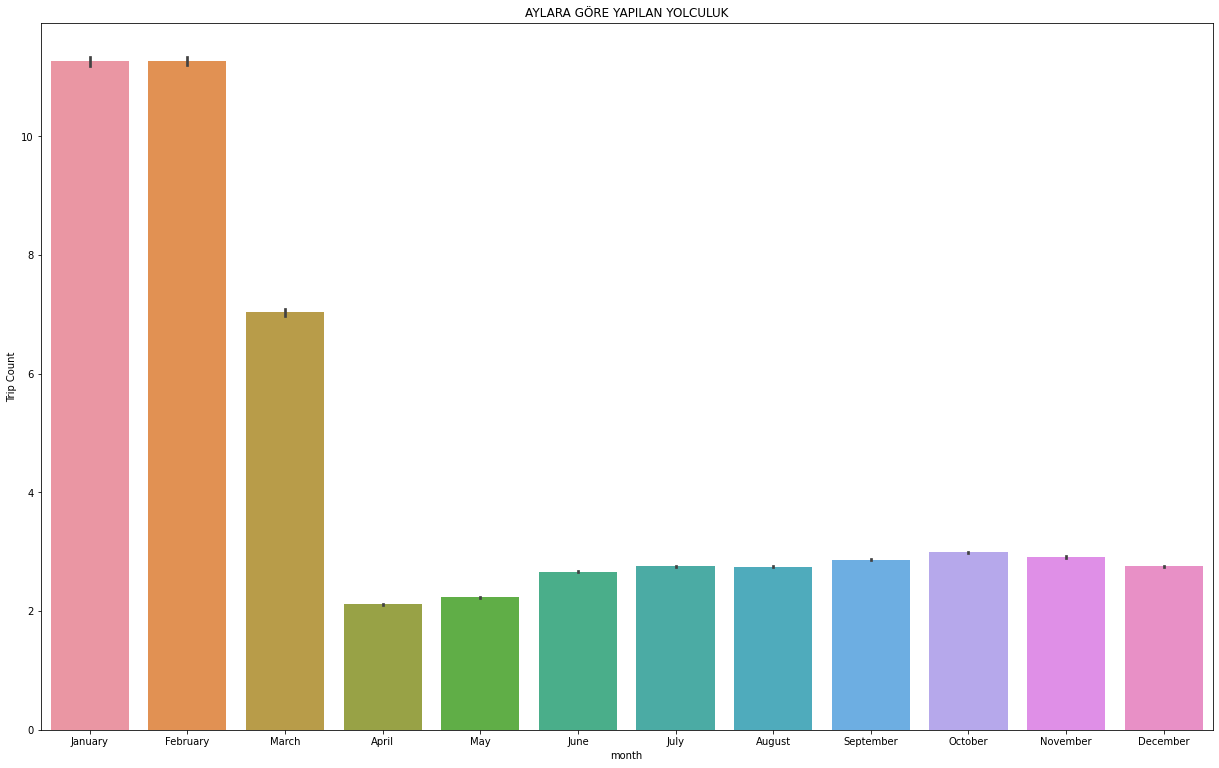

In [ ]:
plt.figure(figsize=(21,13))
sns.barplot(x="month",y="Trip Count",data=df)
plt.title("AYLARA GÖRE YAPILAN YOLCULUK");
#Ocak ve şubat aylarının en yoğun aylar olduğunu görebiliyoruz

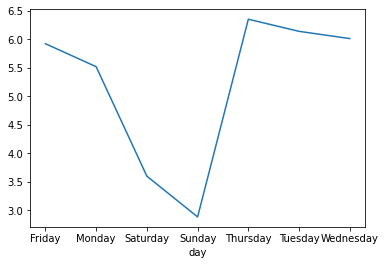

In [ ]:
df.groupby("day")["Trip Count"].mean().plot()

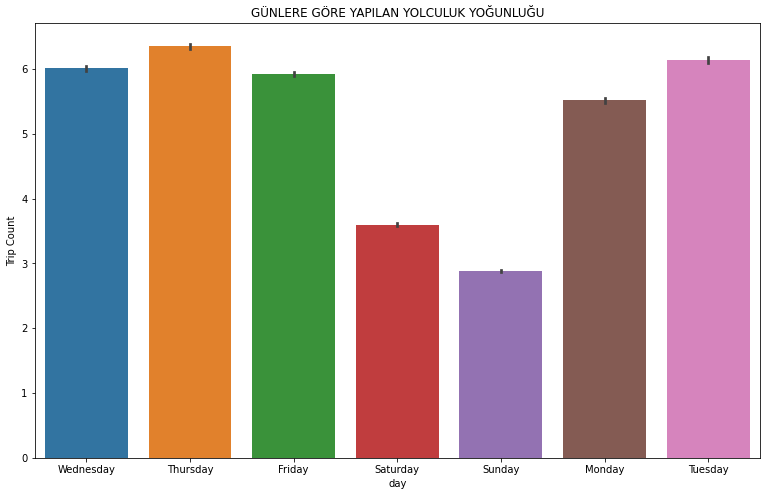

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(x="day",y="Trip Count",data=df)
plt.title("GÜNLERE GÖRE YAPILAN YOLCULUK YOĞUNLUĞU");
#En yoğun günün perşembe günü olduğunu görebiliyoruz
#En müsait günün pazar günü olduğunu görebiliyoruz

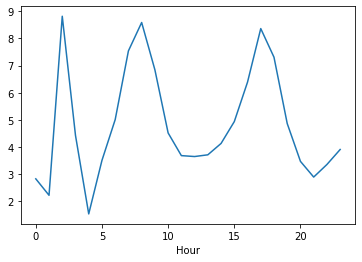

In [ ]:
df.groupby("Hour")["Trip Count"].mean().plot()

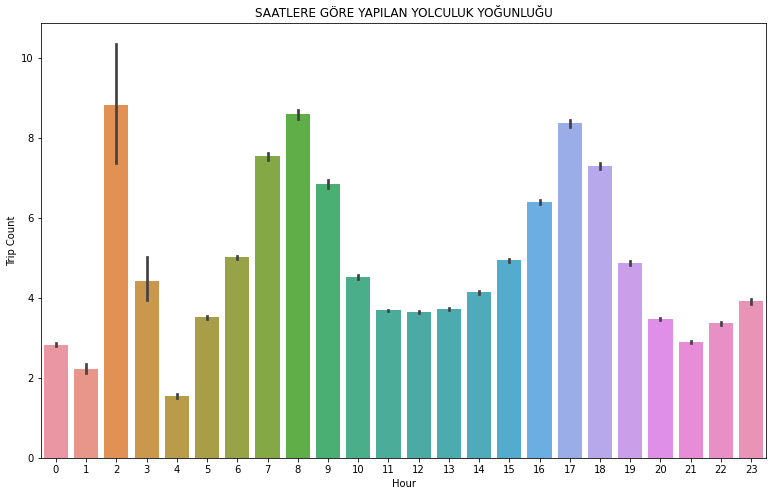

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(x="Hour",y="Trip Count",data=df)
plt.title("SAATLERE GÖRE YAPILAN YOLCULUK YOĞUNLUĞU");


In [11]:
df.to_pickle("bart.pickle")


In [12]:
pck=pd.read_pickle("bart.pickle")

In [13]:
pck.to_csv("bart.csv")

In [3]:
df1=pd.read_csv("bart.csv")

In [4]:
del df1["Unnamed: 0"]

In [6]:
df1.sample()

,Hour,Origin Station,Destination Station,Trip Count,year,month,day,month_num,day_num,Route
3165827,13,EMBR,WARM,2,2020,July,Wednesday,7,2,EMBR-WARM


In [33]:
df2=df1[df1["Route"]=="BERY-SFIA"]
df2

,Hour,Origin Station,Destination Station,Trip Count,year,month,day,month_num,day_num,Route
2914591,12,BERY,SFIA,1,2020,June,Saturday,6,5,BERY-SFIA
2928429,18,BERY,SFIA,1,2020,June,Sunday,6,6,BERY-SFIA
2967680,12,BERY,SFIA,1,2020,June,Wednesday,6,2,BERY-SFIA
3001840,15,BERY,SFIA,1,2020,June,Friday,6,4,BERY-SFIA
3079580,10,BERY,SFIA,2,2020,June,Thursday,6,3,BERY-SFIA
...,...,...,...,...,...,...,...,...,...,...
5568457,15,BERY,SFIA,1,2020,December,Sunday,12,6,BERY-SFIA
5612655,15,BERY,SFIA,1,2020,December,Wednesday,12,2,BERY-SFIA
5621933,8,BERY,SFIA,1,2020,December,Thursday,12,3,BERY-SFIA
5657389,16,BERY,SFIA,1,2020,December,Saturday,12,5,BERY-SFIA


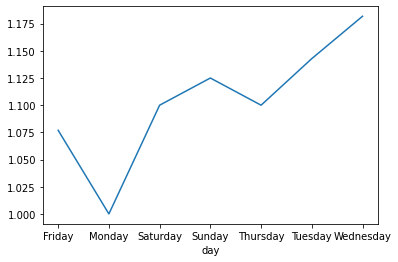

In [ ]:
df2.groupby("day")["Trip Count"].mean().plot()
#Pazartesi BERY den SFİA ya gitmek için uygun bir gün

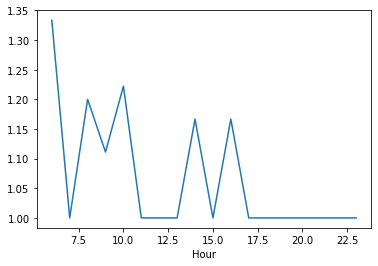

In [ ]:
df2.groupby("Hour")["Trip Count"].mean().plot()
#Saat 0700-1100-1200-1700 ve sonrası uygun saat

In [ ]:
df1[(df1["Hour"]>0) & (df1["Hour"]<6)]["Trip Count"].sum()
#Gece 2400 den sabah 0600 kadar 434754 insan taşınmış

434754

In [17]:
!pip3 install pycaret

     |████████████████████████████████| 264 kB 5.2 MB/s 
     |████████████████████████████████| 271 kB 33.5 MB/s 
     |████████████████████████████████| 2.0 MB 45.5 MB/s 
     |████████████████████████████████| 6.8 MB 24.6 MB/s 
     |████████████████████████████████| 248 kB 66.2 MB/s 
     |████████████████████████████████| 14.6 MB 84 kB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 108 kB 71.2 MB/s 
     |████████████████████████████████| 80 kB 7.3 MB/s 
     |████████████████████████████████| 167 kB 62.5 MB/s 
     |████████████████████████████████| 1.7 MB 40.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 31.8 MB/s 
     |████████████████████████████████| 62 kB 628 kB/s 
     |████████████████████████████████| 636 kB 38.2 MB/s 
     |█████████████████████

In [1]:
from pycaret.regression import*

In [5]:
df2=df1.sample(10000)

In [11]:
df2

,Hour,Origin Station,Destination Station,Trip Count,year,month,day,month_num,day_num,Route
4844103,13,CIVC,ASHB,1,2020,October,Sunday,10,6,CIVC-ASHB
5494771,9,DALY,PITT,1,2020,December,Tuesday,12,1,DALY-PITT
5602989,21,HAYW,DBRK,1,2020,December,Tuesday,12,1,HAYW-DBRK
607534,21,CAST,DALY,2,2020,January,Friday,1,4,CAST-DALY
3025600,17,SFIA,EMBR,3,2020,June,Sunday,6,6,SFIA-EMBR
...,...,...,...,...,...,...,...,...,...,...
2879529,18,RICH,19TH,1,2020,June,Wednesday,6,2,RICH-19TH
311915,8,NBRK,BAYF,1,2020,January,Monday,1,0,NBRK-BAYF
2497653,10,WOAK,LAKE,2,2020,May,Friday,5,4,WOAK-LAKE
5546584,14,DALY,SSAN,3,2020,December,Friday,12,4,DALY-SSAN


In [11]:
x=df2[["month_num","day_num","Hour","Trip Count"]]

In [12]:

x

,month_num,day_num,Hour,Trip Count
231517,1,3,22,1
2389059,4,0,13,1
4766415,10,1,13,1
119246,1,0,1,1
2733024,5,4,14,5
...,...,...,...,...
1730878,3,6,13,4
2105083,3,0,14,3
712286,1,1,22,1
5805902,12,3,14,1


In [13]:
y=df2[["Trip Count"]]

In [17]:
#from imblearn.under_sampling import RandomUnderSampler

In [18]:
#rus = RandomUnderSampler(sampling_strategy = "majority")
#x, y= rus.fit_resample(x,y)

In [14]:
exp_name=setup(data=x,target="Trip Count")

,Description,Value
0,session_id,4357
1,Target,Trip Count
2,Original Data,"(10000, 4)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6999, 20)"


In [15]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,5.7914,418.0977,18.3005,0.0739,0.8945,2.0506,0.308
br,Bayesian Ridge,6.0162,427.6153,18.5277,0.0525,0.9647,2.3219,0.021
ridge,Ridge Regression,6.0933,427.6873,18.5373,0.0507,0.9629,2.3623,0.017
lr,Linear Regression,6.0955,427.6899,18.5376,0.0506,0.9628,2.3634,0.325
lar,Least Angle Regression,6.0954,427.6899,18.5376,0.0506,0.9628,2.3634,0.021
omp,Orthogonal Matching Pursuit,5.8350,430.6345,18.6055,0.0437,0.9129,2.1780,0.020
en,Elastic Net,6.0666,444.7140,18.9449,0.0049,0.9846,2.5087,0.020
lasso,Lasso Regression,6.1110,446.6503,18.9977,-0.0017,0.9935,2.5346,0.020
llar,Lasso Least Angle Regression,6.1201,446.9392,19.0086,-0.0034,0.9953,2.5402,0.018
huber,Huber Regressor,4.4287,452.2189,19.1264,-0.0160,0.7576,0.7338,0.088
